Population Mean: 1560.663453815261
Population Variance: 58732.365352539186
Sample Mean for Wednesdays: 1550.7060000000001
Comparison: Sample Mean (Wednesdays) vs Population Mean: 1550.7060000000001 vs 1560.663453815261
Sample Mean for April: 1698.9526315789474
Comparison: Sample Mean (April) vs Population Mean: 1698.9526315789474 vs 1560.663453815261
Probability of Making a Loss: 0.4979919678714859
Probability of Making a Profit on Wednesday: 0.42
Conditional Probability of Making a Profit Given It's Wednesday: 0.42


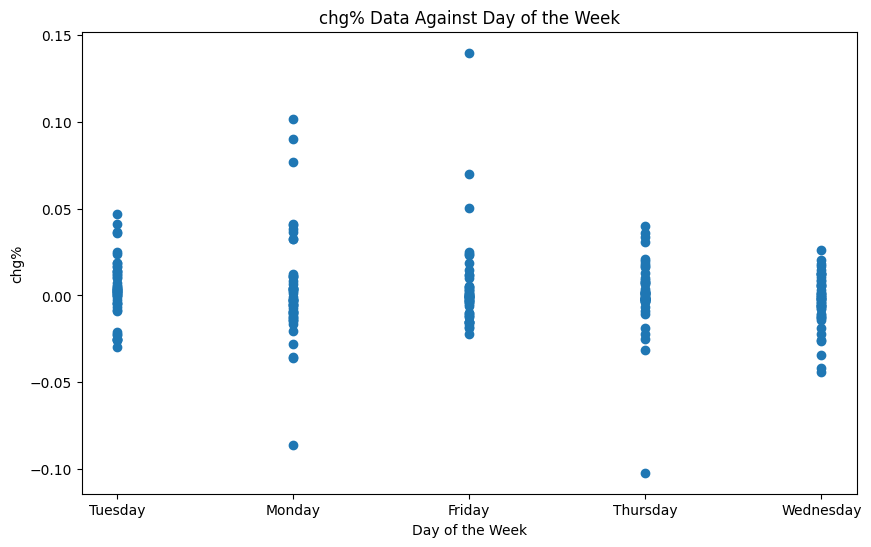

In [20]:
# Import necessary libraries
import pandas as pd
import statistics
import matplotlib.pyplot as plt
# Function to read the Excel file and extract the specified sheet data
def read_excel(file_path, sheet_name):
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        return df

# Function to calculate the mean and variance of a Price column
def calculate_stats(df, column):
    data = df[column].dropna()  # Drop NaN values for accurate calculation
    mean_value = statistics.mean(data)
    variance_value = statistics.variance(data)
    return mean_value, variance_value

# Function to calculate sample mean for Wednesdays
def sample_mean_wednesdays(df, date_column, price_column):
    df[date_column] = pd.to_datetime(df[date_column])
    wednesdays = df[df[date_column].dt.day_name() == 'Wednesday']
    return wednesdays[price_column].mean()

# Function to calculate sample mean for April
def sample_mean_april(df, date_column, price_column):
    df[date_column] = pd.to_datetime(df[date_column])
    april_data = df[df[date_column].dt.month == 4]
    return april_data[price_column].mean()

# Function to calculate probability of making a loss
def probability_of_loss(df, chg_column):
    losses = df[chg_column].apply(lambda x: x < 0)
    return losses.mean()

# Function to calculate probability of making a profit on Wednesdays
def probability_of_profit_on_wednesday(df, date_column, chg_column):
    df[date_column] = pd.to_datetime(df[date_column])
    wednesdays = df[df[date_column].dt.day_name() == 'Wednesday']
    profits = wednesdays[chg_column].apply(lambda x: x > 0)
    return profits.mean()

# Function to calculate conditional probability of making a profit given it's Wednesday
def conditional_probability_profit_given_wednesday(df, date_column, chg_column):
    df[date_column] = pd.to_datetime(df[date_column])
    wednesdays = df[df[date_column].dt.day_name() == 'Wednesday']
    profits_on_wednesdays = wednesdays[chg_column].apply(lambda x: x > 0)
    return profits_on_wednesdays.mean()

# Function to create a scatter plot of chg% data against the day of the week
def scatter_plot_chg_day(df, date_column, chg_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df['Day_of_Week'] = df[date_column].dt.day_name()
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Day_of_Week'], df[chg_column])
    plt.title('chg% Data Against Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('chg%')
    plt.show()

# Main function to perform all tasks
def main():
    # Path to the uploaded Excel file
    file_path = '/content/Lab Session Data.xlsx'

    # Read the Excel file
    df = read_excel(file_path, sheet_name='IRCTC Stock Price')

    if df is not None:

        date_column = 'Date'
        price_column = 'Price'
        chg_column = 'Chg%'
        day_column = 'Day'
        month_column = 'Month'

        # Population mean and variance
        population_mean, population_variance = calculate_stats(df, price_column)
        print(f"Population Mean: {population_mean}")
        print(f"Population Variance: {population_variance}")

        # Sample mean for Wednesdays
        wednesday_mean = sample_mean_wednesdays(df, date_column, price_column)
        print(f"Sample Mean for Wednesdays: {wednesday_mean}")
        print(f"Comparison: Sample Mean (Wednesdays) vs Population Mean: {wednesday_mean} vs {population_mean}")

        # Sample mean for April
        april_mean = sample_mean_april(df, date_column, price_column)
        print(f"Sample Mean for April: {april_mean}")
        print(f"Comparison: Sample Mean (April) vs Population Mean: {april_mean} vs {population_mean}")

        # Probability of making a loss
        prob_loss = probability_of_loss(df, chg_column)
        print(f"Probability of Making a Loss: {prob_loss}")

        # Probability of making a profit on Wednesdays
        prob_profit_wednesday = probability_of_profit_on_wednesday(df, date_column, chg_column)
        print(f"Probability of Making a Profit on Wednesday: {prob_profit_wednesday}")

        # Conditional probability of making a profit given it's Wednesday
        cond_prob_profit_given_wednesday = conditional_probability_profit_given_wednesday(df, date_column, chg_column)
        print(f"Conditional Probability of Making a Profit Given It's Wednesday: {cond_prob_profit_given_wednesday}")

        # Scatter plot of chg% data against the day of the week
        scatter_plot_chg_day(df, date_column, chg_column)

# Execute the main function
main()
